<a href="https://colab.research.google.com/github/quyongkeomut/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow---my-practice/blob/main/Chapter_17_Self_Supervised_learning_%26_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [17]:
import tensorflow as tf
import keras
import numpy as np
import keras.backend as K
tf.random.set_seed(42)
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

## Plot images

In [18]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index]*255)
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index]*255)

In [19]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

## Import Fashion MNIST dataset

In [20]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [21]:
X_train.astype(np.float32)
X_valid.astype(np.float32)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## PCA using undercomplete ANN

In [ ]:
encoder = keras.Sequential([
    keras.layers.Dense(2, input_shape=[3])
])

decoder = keras.Sequential([
    keras.layers.Dense(3, input_shape=[2])
])

autoencoder = keras.Sequential([
    encoder,
    decoder
])
autoencoder.compile(loss="mse", optimizer="adam")

* This autoencoder consists of two seperate parts: the encoder and the decoder. These two are Sequential models of 1 hidden layer.

* The encoder map input to 2-dimensional latent space.

* To perform a simple PCA, we do not use any activation, that means every neurons are linear, and the loss function is MSE.

## Deep Autoencoder

![picture](https://drive.google.com/uc?export=view&id=1SbhCn6_hm-TUHO5eY7-KCammc1_NQMQ2)


###Convolutional Autoencoder

Now we build convolutional autoencoder for MNIST dataset:

In [ ]:
conv_encoder = keras.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, 3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(32, 3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(64, 3, padding="same", activation="selu"),
    keras.layers.GlobalAveragePooling2D()
])
conv_encoder.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_15 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 64)        

In [ ]:
conv_decoder = keras.Sequential([
    keras.layers.Reshape([1, 1, 64],
                        input_shape=[64]),
    keras.layers.Conv2DTranspose(64, 3, 2, activation="selu",
                                 input_shape=[1, 1, 64]),
    keras.layers.Conv2DTranspose(32, 3, 2,
                                 activation="selu"),
    keras.layers.Conv2DTranspose(16, 3, 2, padding="same",
                                 activation="selu"),
    keras.layers.Conv2DTranspose(1, 3, 2, padding="same",
                                 activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_decoder.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_16 (Reshape)        (None, 1, 1, 64)          0         
                                                                 
 conv2d_transpose_39 (Conv2  (None, 3, 3, 64)          36928     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_40 (Conv2  (None, 7, 7, 32)          18464     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_41 (Conv2  (None, 14, 14, 16)        4624      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_42 (Conv2  (None, 28, 28, 1)         145       
 DTranspose)                                         

In [ ]:
conv_autoencoder = keras.Sequential([
    conv_encoder,
    conv_decoder
])
conv_autoencoder.compile(loss="binary_crossentropy",
                         optimizer="adam")

In [ ]:
history = conv_autoencoder.fit(X_train, X_train, epochs=10,
                               validation_data=[X_valid, X_valid])

Epoch 1/10
1719/1719 [==============================] - 61s 34ms/step - loss: 0.3515 - val_loss: 0.3071
Epoch 2/10
1719/1719 [==============================] - 60s 35ms/step - loss: 0.3014 - val_loss: 0.2934
Epoch 3/10
1719/1719 [==============================] - 60s 35ms/step - loss: 0.2927 - val_loss: 0.2868
Epoch 4/10
1719/1719 [==============================] - 60s 35ms/step - loss: 0.2877 - val_loss: 0.2830
Epoch 5/10
1719/1719 [==============================] - 59s 34ms/step - loss: 0.2840 - val_loss: 0.2808
Epoch 6/10
1719/1719 [==============================] - 59s 34ms/step - loss: 0.2813 - val_loss: 0.2773
Epoch 7/10
1719/1719 [==============================] - 60s 35ms/step - loss: 0.2791 - val_loss: 0.2754
Epoch 8/10
1719/1719 [==============================] - 59s 34ms/step - loss: 0.2774 - val_loss: 0.2739
Epoch 9/10
1719/1719 [==============================] - 59s 34ms/step - loss: 0.2760 - val_loss: 0.2725
Epoch 10/10
1719/1719 [==============================] - 61s 35m

1/1 [==============================] - 0s 39ms/step


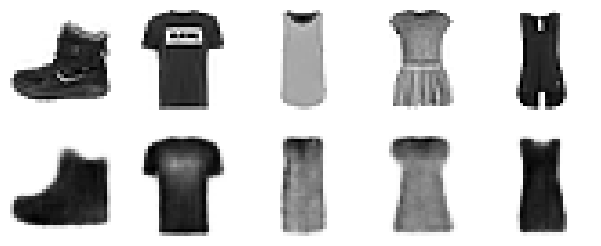

In [ ]:
show_reconstructions(conv_autoencoder)

#### Clustering

In [ ]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_valid_compressed = conv_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

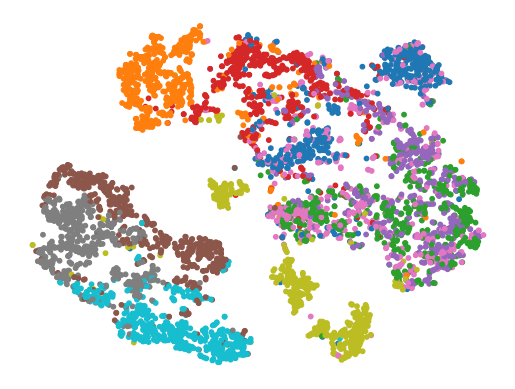

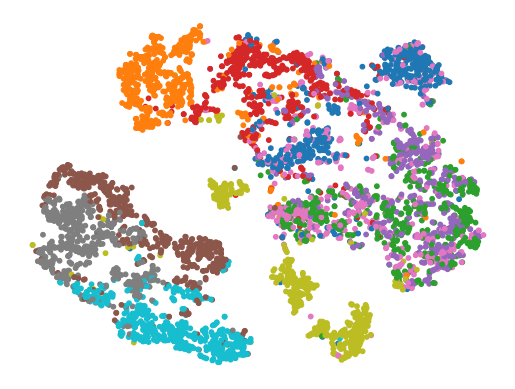

In [ ]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

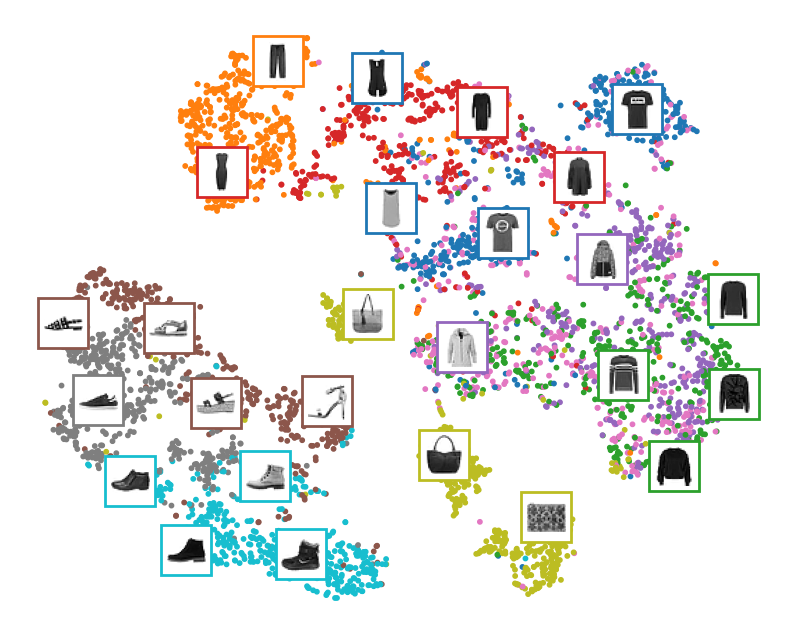

In [ ]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

### Recurrent Autoencoder

In [ ]:
recurrent_encoder = keras.Sequential([
    keras.layers.GRU(100, return_sequences=True,
                     input_shape=[None, 28]),
    keras.layers.GRU(30)
])
recurrent_encoder.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, None, 100)         39000     
                                                                 
 gru_3 (GRU)                 (None, 30)                11880     
                                                                 
Total params: 50880 (198.75 KB)
Trainable params: 50880 (198.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
recurrent_decoder = keras.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.GRU(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28,
                                                    activation="sigmoid"))
])
recurrent_decoder.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 repeat_vector (RepeatVecto  (None, 28, 30)            0         
 r)                                                              
                                                                 
 gru_4 (GRU)                 (None, 28, 100)           39600     
                                                                 
 time_distributed (TimeDist  (None, 28, 28)            2828      
 ributed)                                                        
                                                                 
Total params: 42428 (165.73 KB)
Trainable params: 42428 (165.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
recurrent_autoencoder = keras.Sequential([
    recurrent_encoder,
    recurrent_decoder
])
recurrent_autoencoder.compile(loss="binary_crossentropy",
                              optimizer="adam")

In [ ]:
history = recurrent_autoencoder.fit(X_train, X_train, epochs=10,
                                    validation_data=[X_valid, X_valid])

Epoch 1/10
1719/1719 [==============================] - 121s 67ms/step - loss: 0.3399 - val_loss: 0.3063
Epoch 2/10
1719/1719 [==============================] - 119s 69ms/step - loss: 0.3019 - val_loss: 0.2965
Epoch 3/10
1719/1719 [==============================] - 120s 70ms/step - loss: 0.2932 - val_loss: 0.2871
Epoch 4/10
1719/1719 [==============================] - 103s 60ms/step - loss: 0.2884 - val_loss: 0.2842
Epoch 5/10
1719/1719 [==============================] - 102s 59ms/step - loss: 0.2850 - val_loss: 0.2801
Epoch 6/10
1719/1719 [==============================] - 102s 59ms/step - loss: 0.2823 - val_loss: 0.2784
Epoch 7/10
1719/1719 [==============================] - 102s 59ms/step - loss: 0.2803 - val_loss: 0.2761
Epoch 8/10
1719/1719 [==============================] - 109s 63ms/step - loss: 0.2785 - val_loss: 0.2743
Epoch 9/10
1719/1719 [==============================] - 97s 57ms/step - loss: 0.2771 - val_loss: 0.2735
Epoch 10/10
1719/1719 [==============================] -

#### Plot reconstructed image

1/1 [==============================] - 0s 32ms/step


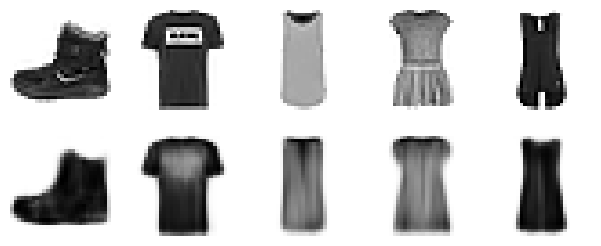

In [ ]:
show_reconstructions(recurrent_autoencoder)

#### Clustering

In [ ]:
X_valid_compressed = recurrent_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

157/157 [==============================] - 2s 11ms/step


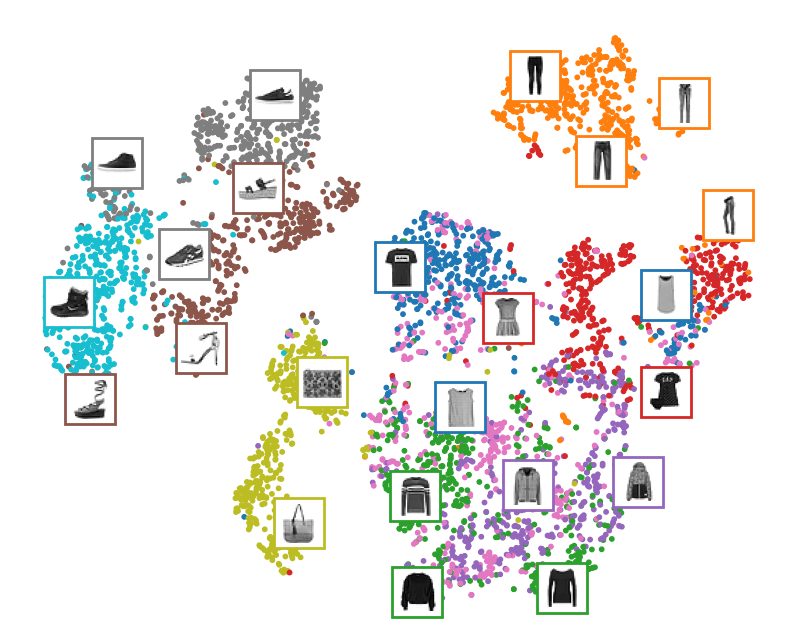

In [ ]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

###Denoising Autoencoders

#### Gaussian Denoising Autoencoder

In [ ]:
gaussian_encoder = keras.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.GaussianNoise(1),
    keras.layers.Conv2D(16, 3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(32, 3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(64, 3, padding="same", activation="selu"),
    keras.layers.GlobalAveragePooling2D()
])
gaussian_decoder = keras.Sequential([
    keras.layers.Reshape([1, 1, 64],
                        input_shape=[64]),
    keras.layers.Conv2DTranspose(64, 3, 2, activation="selu",
                                 input_shape=[1, 1, 64]),
    keras.layers.Conv2DTranspose(32, 3, 2,
                                 activation="selu"),
    keras.layers.Conv2DTranspose(16, 3, 2, padding="same",
                                 activation="selu"),
    keras.layers.Conv2DTranspose(1, 3, 2, padding="same",
                                 activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [ ]:
gaussian_autoencoder = keras.Sequential([
    gaussian_encoder,
    gaussian_decoder
])
gaussian_autoencoder.compile(loss="binary_crossentropy",
                             optimizer="adam")

In [ ]:
history = gaussian_autoencoder.fit(X_train, X_train, epochs=10,
                                   validation_data=[X_valid, X_valid])

Epoch 1/10
1719/1719 [==============================] - 14s 7ms/step - loss: 0.3795 - val_loss: 0.3763
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3342 - val_loss: 0.3486
Epoch 3/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3274 - val_loss: 0.3374
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3243 - val_loss: 0.3214
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3220 - val_loss: 0.3172
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3202 - val_loss: 0.3096
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3189 - val_loss: 0.3078
Epoch 8/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3178 - val_loss: 0.3036
Epoch 9/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3170 - val_loss: 0.3016
Epoch 10/10
1719/1719 [==============================] - 11s 6ms/step - l

1/1 [==============================] - 0s 408ms/step


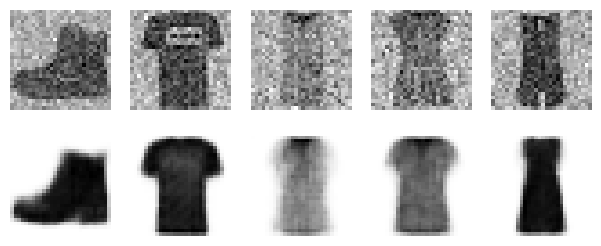

In [ ]:
noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(gaussian_autoencoder, noise(X_valid, training=True))

#### Dropout Autoencoder

In [ ]:
dropout_encoder = keras.Sequential([
    keras.layers.GRU(100, return_sequences=True,
                     input_shape=[None, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.GRU(30)
])

dropout_decoder = keras.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.GRU(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28,
                                                    activation="sigmoid"))
])

In [ ]:
dropout_autoencoder = keras.Sequential([
    dropout_encoder,
    dropout_decoder
])
dropout_autoencoder.compile(loss="binary_crossentropy",
                             optimizer="adam")

In [ ]:
history = dropout_autoencoder.fit(X_train, X_train, epochs=10,
                                  validation_data=[X_valid, X_valid])

Epoch 1/10
1719/1719 [==============================] - 64s 35ms/step - loss: 0.3452 - val_loss: 0.3122
Epoch 2/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3070 - val_loss: 0.2996
Epoch 3/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2985 - val_loss: 0.2920
Epoch 4/10
1719/1719 [==============================] - 16s 10ms/step - loss: 0.2930 - val_loss: 0.2872
Epoch 5/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2894 - val_loss: 0.2836
Epoch 6/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2867 - val_loss: 0.2822
Epoch 7/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.2845 - val_loss: 0.2799
Epoch 8/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2829 - val_loss: 0.2782
Epoch 9/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2814 - val_loss: 0.2760
Epoch 10/10
1719/1719 [==============================] - 20s 11ms

1/1 [==============================] - 1s 789ms/step


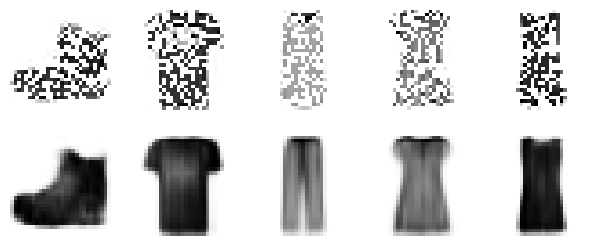

In [ ]:
dropout = keras.layers.Dropout(0.5)
show_reconstructions(dropout_autoencoder, dropout(X_valid, training=True))

1/1 [==============================] - 0s 19ms/step


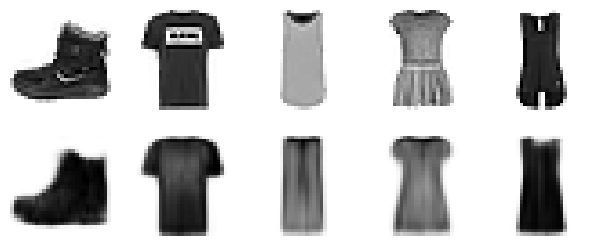

In [ ]:
show_reconstructions(dropout_autoencoder)

### Variational Bayes Autoencoder

In [ ]:
class SamplingLayer(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(K.shape(log_var)) * K.exp(log_var/2) + mean

In [ ]:
embedding_size = 64

In [ ]:
inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Reshape([28, 28, 1], input_shape=[28, 28])(inputs)
z = keras.layers.Conv2D(16, 3, padding="same", activation="selu")(z)
z = keras.layers.MaxPool2D(2)(z)
z = keras.layers.Conv2D(32, 3, padding="same", activation="selu")(z)
z = keras.layers.MaxPool2D(2)(z)
z = keras.layers.Conv2D(64, 3, padding="same", activation="selu")(z)
z = keras.layers.GlobalAveragePooling2D()(z)

embedding_mean = keras.layers.Dense(embedding_size)(z) #<:μ:>
embedding_log_var = keras.layers.Dense(embedding_size)(z) #<:γ:>
embedding = SamplingLayer()([embedding_mean, embedding_log_var])

variational_encoder = keras.Model(
    inputs=[inputs], outputs=[embedding_mean, embedding_log_var, embedding]
)

In [ ]:
decoder_inputs = keras.layers.Input(shape=[embedding_size])
x =  keras.layers.Reshape([1, 1, 64],
                          input_shape=[64])(decoder_inputs)
x = keras.layers.Conv2DTranspose(64, 3, 2, activation="selu",
                                 input_shape=[1, 1, 64])(x)
x = keras.layers.Conv2DTranspose(32, 3, 2,
                                 activation="selu")(x)
x = keras.layers.Conv2DTranspose(16, 3, 2, padding="same",
                                 activation="selu")(x)
x = keras.layers.Conv2DTranspose(1, 3, 2, padding="same",
                                 activation="sigmoid")(x)
output_img = keras.layers.Reshape([28, 28])(x)

variational_decoder = keras.Model(
    inputs=[decoder_inputs], outputs=[output_img]
)

In [ ]:
_, _, embeddings = variational_encoder(inputs)
reconstructions = variational_decoder(embeddings)
variational_ae = keras.Model(inputs=[inputs], outputs=[reconstructions])

Define loss function

In [ ]:
latent_loss = -0.5 * K.sum(
    1 + embedding_log_var - K.exp(embedding_log_var) - K.square(embedding_mean),
    axis=-1
)
variational_ae.add_loss(K.mean(latent_loss)/784.)
variational_ae.compile(loss="binary_crossentropy",
                       optimizer="rmsprop")

In [ ]:
history = variational_ae.fit(X_train, X_train,
                             epochs=50, batch_size=128,
                             validation_data=[X_valid, X_valid])

Epoch 1/50
430/430 [==============================] - 15s 16ms/step - loss: 0.5392 - val_loss: 0.4212
Epoch 2/50
430/430 [==============================] - 5s 12ms/step - loss: 0.4027 - val_loss: 0.3871
Epoch 3/50
430/430 [==============================] - 3s 8ms/step - loss: 0.3722 - val_loss: 0.3619
Epoch 4/50
430/430 [==============================] - 3s 8ms/step - loss: 0.3581 - val_loss: 0.3508
Epoch 5/50
430/430 [==============================] - 4s 8ms/step - loss: 0.3503 - val_loss: 0.3450
Epoch 6/50
430/430 [==============================] - 4s 9ms/step - loss: 0.3450 - val_loss: 0.3409
Epoch 7/50
430/430 [==============================] - 3s 8ms/step - loss: 0.3412 - val_loss: 0.3355
Epoch 8/50
430/430 [==============================] - 3s 8ms/step - loss: 0.3382 - val_loss: 0.3336
Epoch 9/50
430/430 [==============================] - 4s 9ms/step - loss: 0.3360 - val_loss: 0.3322
Epoch 10/50
430/430 [==============================] - 3s 8ms/step - loss: 0.3343 - val_loss: 0.3

Create Fashion MNIST images

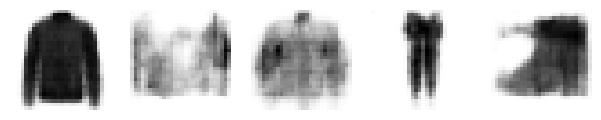

In [ ]:
embeddings = K.random_normal(shape=[5, embedding_size])
images = variational_decoder(embeddings).numpy()
fig = plt.figure(figsize=(5 * 1.5, 3))
for image_index in range(5):
    plt.subplot(2, 5, 1 + 5 + image_index)
    plot_image(images[image_index]*255)

In [ ]:
embeddings = K.random_normal(shape=[6, embedding_size])
embeddings_grid = K.reshape(embeddings, [1, 2, 3, embedding_size])
larger_grid = tf.image.resize(embeddings_grid, size=[3, 5])
interpolated_embeddings = K.reshape(larger_grid, [-1, embedding_size])
images = variational_decoder(interpolated_embeddings).numpy()

In [ ]:
K.shape(images)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([15, 28, 28], dtype=int32)>

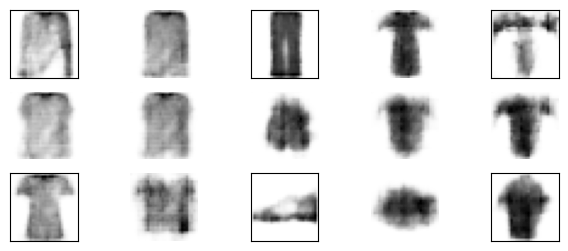

In [ ]:
plt.figure(figsize=(5 * 1.5, 3))
for image_index in range(15):
    plt.subplot(3, 5, image_index + 1)
    if image_index%5%2==0 and image_index//5%2==0:
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    else:
        plt.axis("off")
    plt.imshow(images[image_index]*255, cmap="binary")

## GAN

In [22]:
coding_size = 30

In [23]:
generator = keras.Sequential([
    keras.layers.Reshape([1, 1, 30],
                        input_shape=[30]),
    keras.layers.Conv2DTranspose(100, 3, 2, activation="selu",
                                 input_shape=[1, 1, 64]),
    keras.layers.Conv2DTranspose(250, 3, 2,
                                 activation="selu"),
    keras.layers.Conv2DTranspose(32, 3, 2, padding="same",
                                 activation="selu"),
    keras.layers.Conv2DTranspose(1, 3, 2, padding="same",
                                 activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

discrimator = keras.Sequential([
    keras.layers.Reshape([28, 28, 1]),
    keras.layers.Conv2D(16, 3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(32, 3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(64, 3, padding="same", activation="selu"),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

gan = keras.Sequential([
    generator,
    discrimator
])

In [24]:
discrimator.compile(loss="binary_crossentropy",
                    optimizer="rmsprop")
discrimator.trainable = False
gan.compile(loss="binary_crossentropy",
            optimizer="rmsprop")

In [25]:
BATCH_SIZE = 32
dataset = tf.data.Dataset.from_tensor_slices(tf.cast(X_train, tf.float32)).shuffle(1000)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [26]:
def train_gan(model, dataset, batch_size, coding_size, n_epochs=50):
    generator, discrimator = model.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))
        for X_batch in dataset:
            #phase 1: train the discrimator
            noise = K.random_normal(shape=[batch_size, coding_size], dtype=tf.float32)
            X_fake = generator(noise)
            X_real_n_fale = K.concatenate([X_batch, X_fake], axis=0)
            y_real_n_fake = tf.constant([1.]*batch_size + [0.]*batch_size)
            discrimator.train_on_batch(X_real_n_fale, y_real_n_fake)
            #phase 2: train the generator
            noise = K.random_normal(shape=[batch_size, coding_size])
            y_fake = tf.constant([1.]*batch_size)
            gan.train_on_batch(noise, y_fake)
        plot_multiple_images(X_fake, 8)
        plt.show()

Epoch 1/50


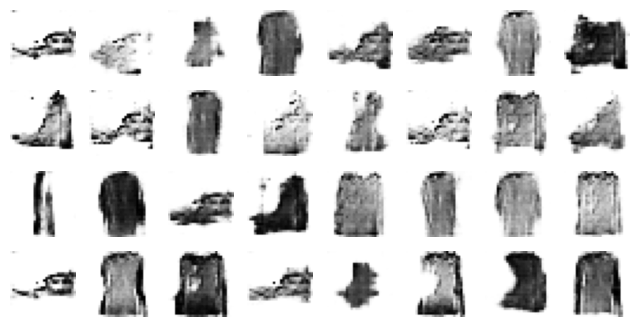

Epoch 2/50


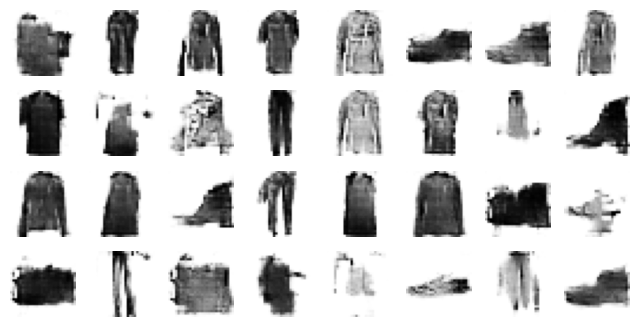

Epoch 3/50


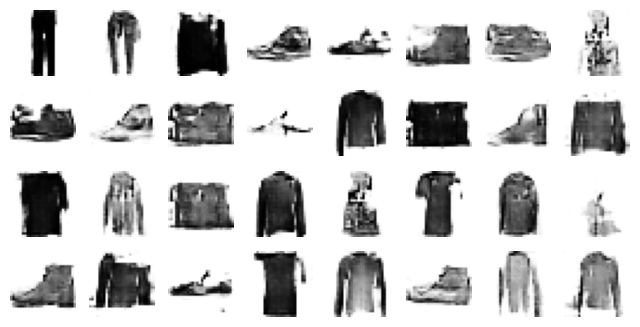

Epoch 4/50


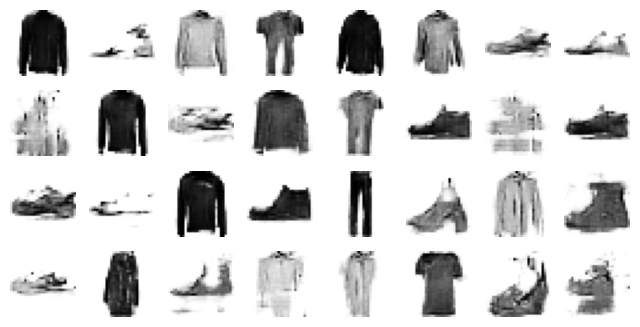

Epoch 5/50


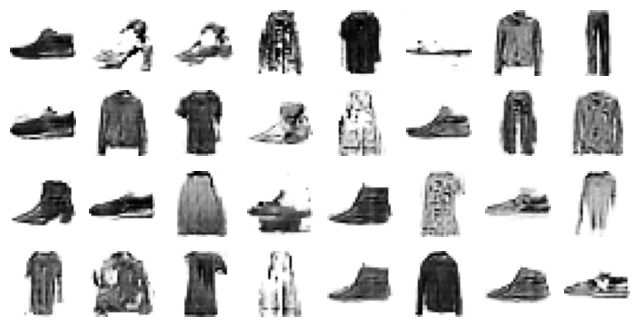

Epoch 6/50


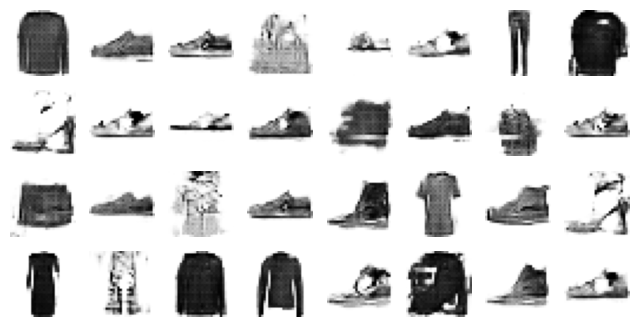

Epoch 7/50


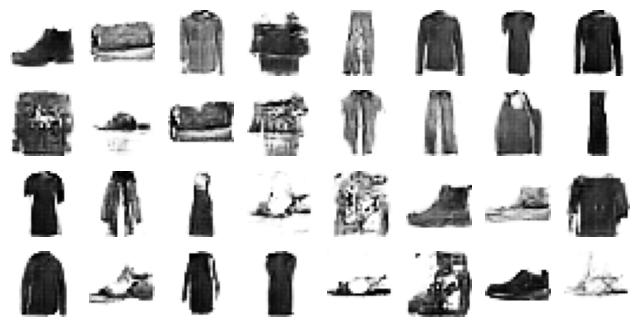

Epoch 8/50


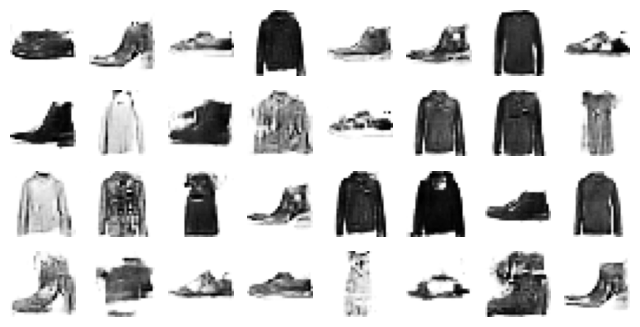

Epoch 9/50


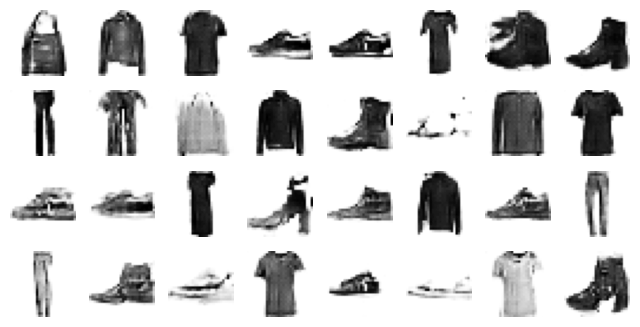

Epoch 10/50


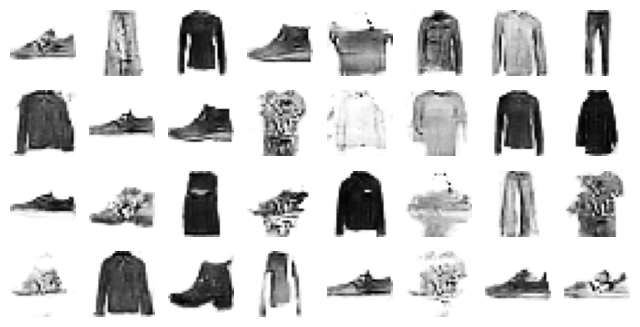

Epoch 11/50


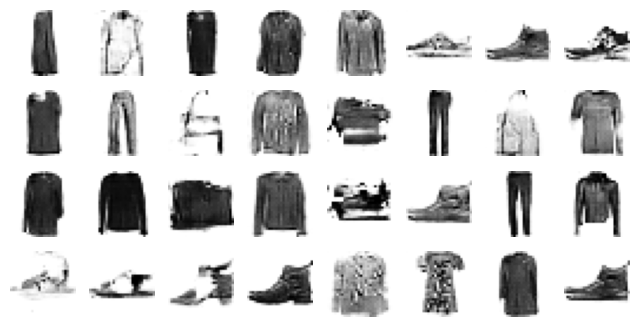

Epoch 12/50


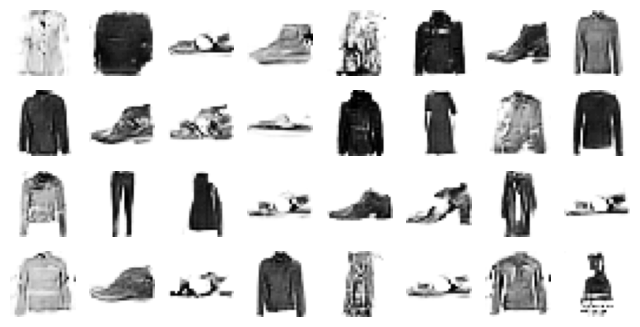

Epoch 13/50


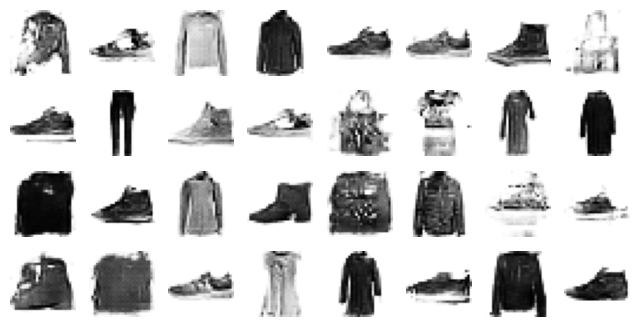

Epoch 14/50


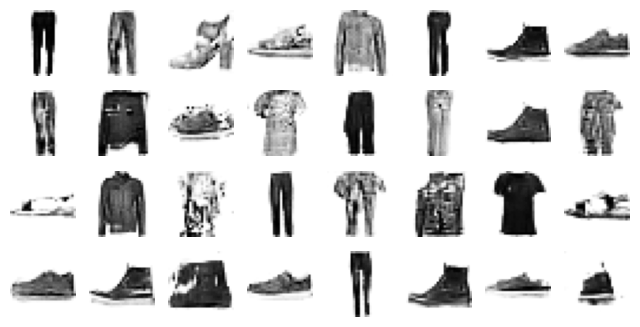

Epoch 15/50


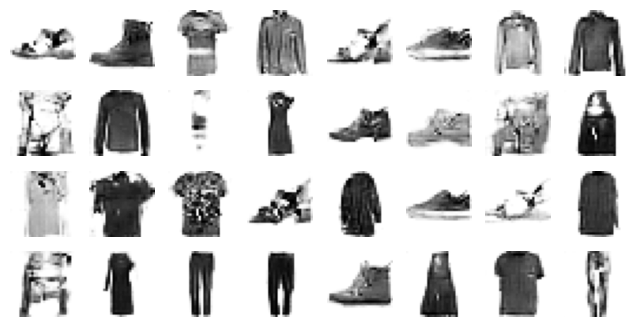

Epoch 16/50


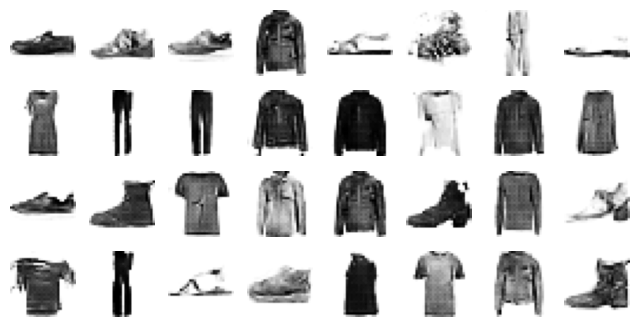

Epoch 17/50


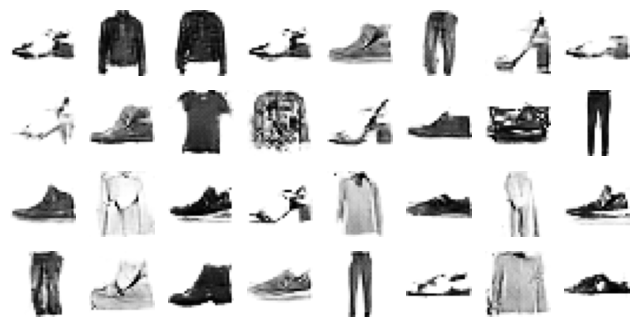

Epoch 18/50


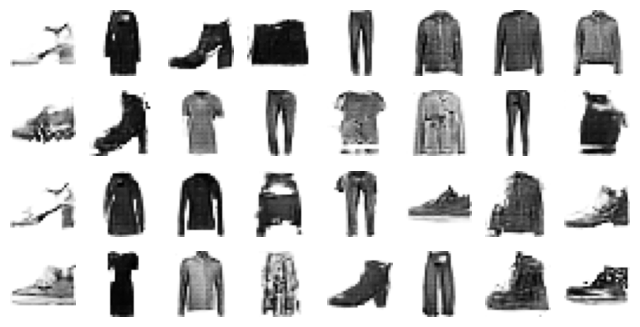

Epoch 19/50


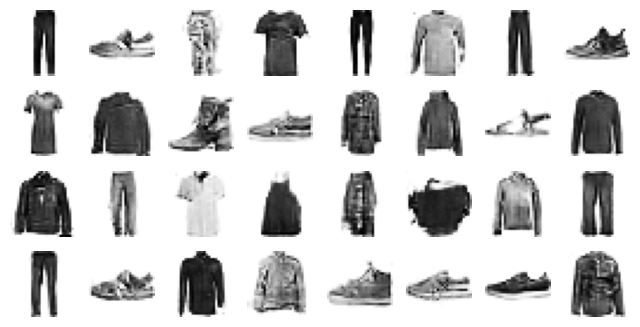

Epoch 20/50


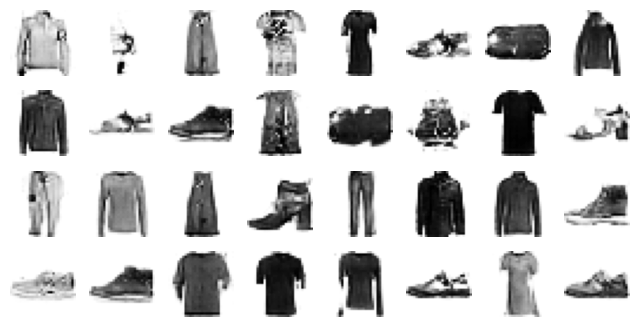

Epoch 21/50


In [ ]:
train_gan(gan, dataset, BATCH_SIZE, coding_size)

### DCGAN